In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.metrics import classification_report, ConfusionMatrixDisplay

import joblib

In [3]:
df = pd.read_json(path_or_buf = '../../data/processed/dataset.json', orient = 'records')

# EDA

In [4]:
df

,pattern,type
0,"<li><a href=""/wiki/file:socrates.png"" class=""i...",valid
1,"<tt onmouseover=""alert(1)"">test</tt>",xss
2,"</span> <span class=""reference-text"">steering ...",valid
3,"</span> <span class=""reference-text""><cite cla...",valid
4,"</span>. <a href=""/wiki/digital_object_identif...",valid
...,...,...
90248,14.32.73.68 ; tftp 192.168.10.33 test.txt,cmdi
90249,mer5ataoedtd7=18.234.0.160;tftp 192.168.10.33 ...,cmdi
90250,tupfa=txtn3vtelbyensifc;atsr=nncrrnakm2;ooh=aw...,cmdi
90251,snauhdqztaagso=ut7yetaureapaeljl;iiveefesaa=3....,cmdi


<AxesSubplot: ylabel='type'>

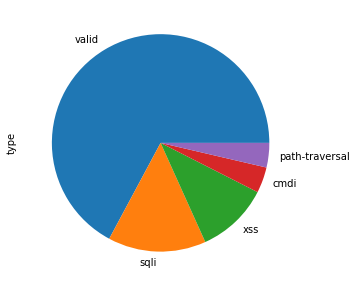

In [5]:
df['type'].value_counts().plot.pie(figsize=(5, 5))

In [6]:
X = df['pattern'].to_numpy().astype(str)
y = df['type'].to_numpy().astype(str)

In [7]:
len(X), len(y)

(90253, 90253)

# Modeling

In [8]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [ ]:
pipe = make_pipeline(TfidfVectorizer(input = 'content', lowercase = True, analyzer = 'char', max_features = 1024), SVC())

param_grid = {'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 4)], 'svc__C': [1, 10], 'svc__kernel': ['linear', 'rbf']}

grid = GridSearchCV(pipe, param_grid, cv = 2, verbose = 4)

grid.fit(trainX, trainY)

In [ ]:
grid.score(testX, testY)

In [ ]:
preds = grid.predict(testX)

print(classification_report(testY, preds))

In [ ]:
ConfusionMatrixDisplay.from_estimator(grid, testX, testY)

In [ ]:
grid.best_params_

In [9]:
pipe = make_pipeline(TfidfVectorizer(input = 'content', lowercase = True, analyzer = 'char', max_features = 1024, ngram_range = (1, 4)), SVC(C = 10, kernel = 'rbf', probability = True))

pipe.fit(trainX, trainY)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='char', max_features=1024,
                                 ngram_range=(1, 4))),
                ('svc', SVC(C=10, probability=True))])

In [10]:
pipe.score(trainX, trainY)

0.9999704531016856

In [11]:
pipe.score(testX, testY)

0.9942829285587662

In [12]:
preds = pipe.predict(testX)

print(classification_report(testY, preds))

                precision    recall  f1-score   support

          cmdi       0.98      0.96      0.97       865
path-traversal       0.98      0.96      0.97       822
          sqli       1.00      0.99      0.99      3288
         valid       0.99      1.00      1.00     15156
           xss       1.00      1.00      1.00      2433

      accuracy                           0.99     22564
     macro avg       0.99      0.98      0.99     22564
  weighted avg       0.99      0.99      0.99     22564



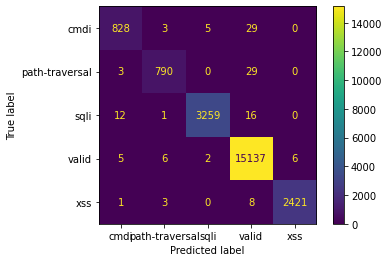

In [13]:
ConfusionMatrixDisplay.from_estimator(pipe, testX, testY)

In [14]:
joblib.dump(pipe, '../../metamaska/models/payload_clf.joblib', protocol=2, compress=3)

['../../metamaska/models/payload_clf.joblib']